In [18]:
# ruff: disable
"""An example notebook for a data_analysis notebook you may write.

Please use the recommended TNR font unless your venue requires otherwise.
"""

# Write down all of your code for data analysis in this file.
# Plot the data and save the figures/tables in the folders "plots" and "tables"
import matplotlib.pyplot as plt
import seaborn as sns

# Use TNR for all figures
# to match paper templates
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = [
    "Times New Roman",
] + plt.rcParams["font.serif"]

# Whitegrid is most appropriate
# for scientific papers
sns.set_style("whitegrid")

# An optional colorblind palette
# for figures
CB_color_cycle = [
    "#377EB8",
    "#FF7F00",
    "#4DAF4A",
    "#F781BF",
    "#A65628",
    "#984EA3",
    "#999999",
    "#E41A1C",
    "#DEDE00",
]

In [19]:
from project.task.mnist_classification.dataset import get_dataloader_generators
import torch
from pathlib import Path

In [20]:
client_dataset_generator, _ = get_dataloader_generators(Path("../data/mnist/partition"))

In [21]:
from hydra import compose, initialize
from omegaconf import OmegaConf


def get_config(seed):
    with initialize(version_base=None, config_path="../project/conf", job_name="mnist"):
        cfg = compose(config_name="mnist", overrides=[f"fed=mnist_{seed}"])
    cfg = OmegaConf.to_container(cfg, resolve=True)
    cfg["torch_generator"] = torch.Generator().manual_seed(int(cfg["fed"]["seed"]))
    return cfg
    # return OmegaConf.to_yaml(cfg)

In [22]:
config = get_config(1)

In [23]:
def plot_data(cid, ax=None, title=""):
    if ax is None:
        _, ax = plt.subplots()
    loader = client_dataset_generator(
        cid,
        False,
        config["task"]["fit_config"]["dataloader_config"],
        (None, None, None, config["torch_generator"]),
    )  # config.fed.seed)

    sns.histplot(
        [y for x, y in loader.dataset], ax=ax, binwidth=1, binrange=(0, 9)
    ).set_title(title)

In [24]:
import pandas as pd

In [25]:
train_values = []
test_values = []

for i in range(10):
    train_loader = client_dataset_generator(
        i,
        False,
        config["task"]["fit_config"]["dataloader_config"],
        (None, None, None, config["torch_generator"]),
    )  # config.fed.seed)
    train_values.append([y for x, y in train_loader.dataset])

    test_loader = client_dataset_generator(
        i,
        True,
        config["task"]["fit_config"]["dataloader_config"],
        (None, None, None, config["torch_generator"]),
    )  # config.fed.seed)
    test_values.append([y for x, y in test_loader.dataset])

<Axes: >

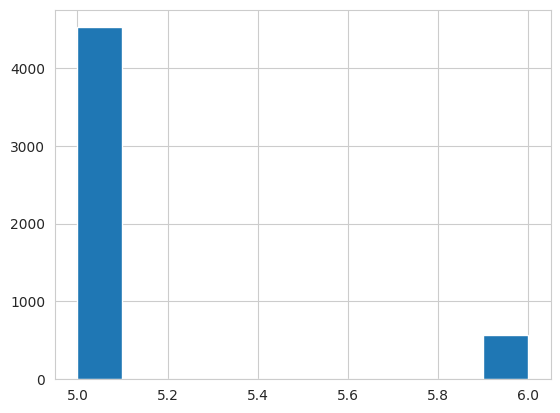

In [43]:
pd.DataFrame(train_values, index=[f"client_{i}" for i in range(10)]).T.client_5.hist()

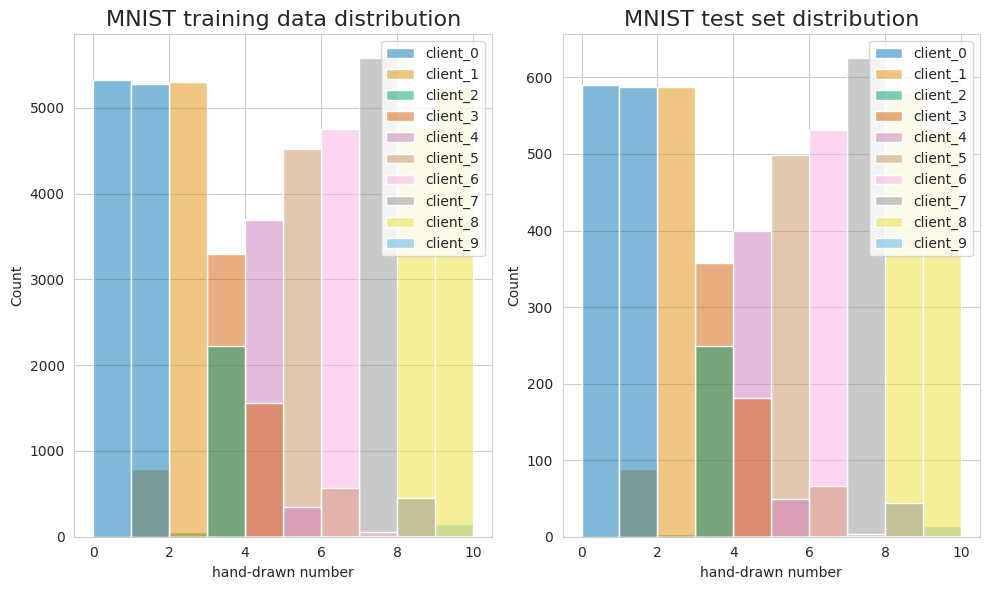

In [35]:
fix, ax = plt.subplots(1, 2, figsize=(10, 6))
x = sns.histplot(
    pd.DataFrame(train_values, index=[f"client_{i}" for i in range(10)]).T,
    binwidth=1,
    binrange=(0, 10),
    palette="colorblind",
    ax=ax[0],
)
x.set(xlabel="hand-drawn number")
x.set_title("MNIST training data distribution", fontsize=16)

x = sns.histplot(
    pd.DataFrame(test_values, index=[f"client_{i}" for i in range(10)]).T,
    binwidth=1,
    binrange=(0, 10),
    palette="colorblind",
    ax=ax[1],
)
x.set(xlabel="hand-drawn number")
x.set_title("MNIST test set distribution", fontsize=16)

plt.tight_layout()

plt.savefig("./plots/MNIST_distribution.png")

In [ ]:
loader = client_dataset_generator(
    5,
    False,
    config["task"]["fit_config"]["dataloader_config"],
    (None, None, None, config["torch_generator"]),
)  # config.fed.seed)

In [28]:
def plot2x2Array(image, mask):
    f, axarr = plt.subplots(1, 2)
    axarr[0].imshow(image)
    axarr[1].imshow(mask)
    axarr[0].grid()
    axarr[1].grid()
    axarr[0].set_title("Image")
    axarr[1].set_title("Mask")

In [29]:
loader.dataset[3]

(tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.424

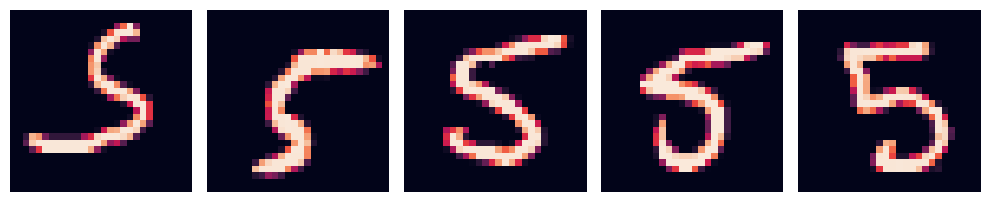

In [30]:
import numpy as np

np.random.seed(1337)

n_images = 5

images = [x for x, y in loader.dataset if y == 5]

randoms = np.random.choice(len(images), n_images, replace=False)

fig, axes = plt.subplots(1, n_images, figsize=(10, 6))
for ax, idx in zip(axes, randoms, strict=False):
    ax.imshow(images[idx][0])
    ax.axis("off")

plt.tight_layout()
plt.savefig("./plots/feature_skew.png", bbox_inches="tight")

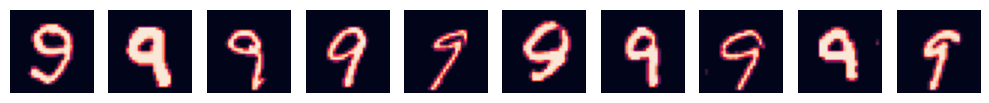

In [50]:
loader = client_dataset_generator(
    9,
    False,
    config["task"]["fit_config"]["dataloader_config"],
    (None, None, None, config["torch_generator"]),
)  # config.fed.seed)

import numpy as np

np.random.seed(137)

n_images = 10

images = [x for x, y in loader.dataset if y == 9]

randoms = np.random.choice(len(images), n_images, replace=False)

fig, axes = plt.subplots(1, n_images, figsize=(10, 6))
for ax, idx in zip(axes, randoms, strict=False):
    ax.imshow(images[idx][0])
    ax.axis("off")

plt.tight_layout()
# plt.savefig('./plots/feature_skew.png', bbox_inches='tight')

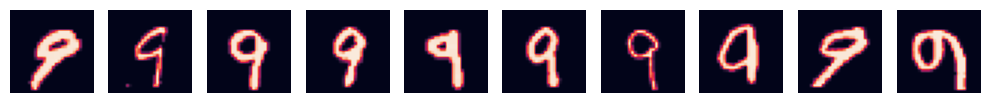

In [48]:
loader = client_dataset_generator(
    8,
    False,
    config["task"]["fit_config"]["dataloader_config"],
    (None, None, None, config["torch_generator"]),
)  # config.fed.seed)

import numpy as np

np.random.seed(1337)

n_images = 10

images = [x for x, y in loader.dataset if y == 9]

randoms = np.random.choice(len(images), n_images, replace=False)

fig, axes = plt.subplots(1, n_images, figsize=(10, 6))
for ax, idx in zip(axes, randoms, strict=False):
    ax.imshow(images[idx][0])
    ax.axis("off")

plt.tight_layout()
# plt.savefig('./plots/feature_skew.png', bbox_inches='tight')

In [31]:
dataset = loader.dataset

In [32]:
len(loader.dataset)

5085

<Axes: ylabel='Count'>

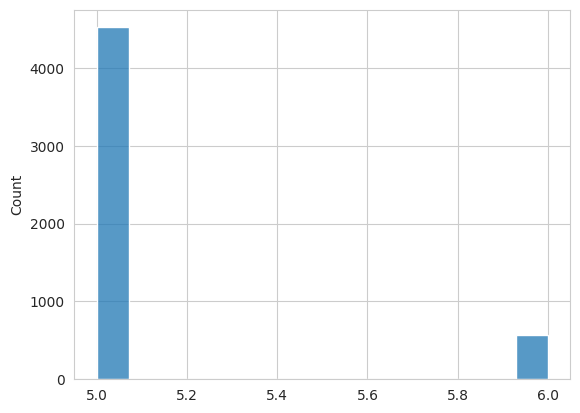

In [33]:
sns.histplot([y for x, y in loader.dataset])

In [34]:
import numpy as np

np.array([y for x, y in loader.dataset])

array([5, 5, 5, ..., 5, 5, 5])